In [1]:
# Linear Regression

In [2]:
'''
    У даній лабораторній роботі на основі попередньо оброблених даних про автомобілі спробуємо побудувати лінійну регресію
для прогнозування ціни автомобіля.
    У роботі буде розглянуто однофакторну лінійну регресію, багатофакторну лінійну регресію з усіма змінними в якості
аргументів (окрім, звичайно, ціни автомобіля), поліноміальну лінійну регресію і багатофакторну лінійну регресію з оптимальним
набором аргументів, відібраних з використанням методу оберненого виключення Backward Elimination.
    Для цього дані для побудови моделей буде розділено на навчальну та тестову вибірку, аби перевірити прогнозні якості
моделей. Для перевірки якості оцінки та прогнозу моделями будуть використовуватися такі метрики як коефіцієнт
детермінації R^2 та cередньоквадратична помилка MSE.
'''

'\n    У даній лабораторній роботі на основі попередньо оброблених даних про автомобілі спробуємо побудувати лінійну регресію\nдля прогнозування ціни автомобіля.\n    У роботі буде розглянуто однофакторну лінійну регресію, багатофакторну лінійну регресію з усіма змінними в якості\nаргументів (окрім, звичайно, ціни автомобіля), поліноміальну лінійну регресію і багатофакторну лінійну регресію з оптимальним\nнабором аргументів, відібраних з використанням методу оберненого виключення Backward Elimination.\n    Для цього дані для побудови моделей буде розділено на навчальну та тестову вибірку, аби перевірити прогнозні якості\nмоделей. Для перевірки якості оцінки та прогнозу моделями будуть використовуватися такі метрики як коефіцієнт\nдетермінації R^2 та cередньоквадратична помилка MSE.\n'

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
df=pd.read_csv('Cars_prep (Tomilovych, EC-61).csv', sep=';')
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,16500.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,16500.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,0,0,1,16845.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,0,0,1,19045.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,1,0,0,0,1,21485.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,1,0,0,1,0,22470.0


In [5]:
'''
    Почнемо з побудови однофакторної лінійної регресії. Для цього спочатку побудуємо кореляційну матрицю даних, за якою
визначимо аргумент, що найбільше корелює зі ціною автомобіля.
'''

'\n    Почнемо з побудови однофакторної лінійної регресії. Для цього спочатку побудуємо кореляційну матрицю даних, за якою\nвизначимо аргумент, що найбільше корелює зі ціною автомобіля.\n'

In [6]:
# Cheking correlations
df.corr()
#print(df.corr())

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
symboling,1.000000,0.194311,-0.059866,0.663595,0.212471,-0.535721,-0.357612,-0.232919,-0.541038,-0.227691,...,-0.013597,-0.090188,-0.034161,-0.023410,-0.000238,-0.037911,-0.034069,-0.194311,0.012532,-0.082392
fuel-type,0.194311,1.000000,-0.401397,0.188496,0.040070,-0.312947,-0.212679,-0.233880,-0.284631,-0.217275,...,0.085556,-0.213527,0.020184,0.057092,0.068594,0.078293,0.226565,-1.000000,0.302574,-0.117895
aspiration,-0.059866,-0.401397,1.000000,-0.052803,-0.057191,0.262110,0.234539,0.300567,0.087311,0.324902,...,-0.070070,0.225968,0.009195,-0.081488,-0.091987,-0.111748,-0.323378,0.401397,-0.050041,0.188866
num-of-doors,0.663595,0.188496,-0.052803,1.000000,0.139129,-0.441668,-0.385675,-0.197735,-0.540286,-0.190720,...,0.054764,-0.077550,-0.071464,0.081459,0.017770,0.097150,-0.013769,-0.188496,-0.035746,-0.050724
engine-location,0.212471,0.040070,-0.057191,0.139129,1.000000,-0.189508,-0.050989,-0.051698,-0.106234,0.050468,...,-0.031711,-0.029019,-0.226571,-0.021161,0.334671,-0.029019,-0.083975,-0.040070,0.132429,0.344696
wheel-base,-0.535721,-0.312947,0.262110,-0.441668,-0.189508,1.000000,0.875182,0.795040,0.592005,0.776469,...,0.155095,0.264944,-0.306739,0.238645,0.148721,-0.192437,-0.398678,0.312947,0.349186,0.577620
length,-0.357612,-0.212679,0.234539,-0.385675,-0.050989,0.875182,1.000000,0.841118,0.491029,0.877728,...,0.244053,0.259894,-0.400210,0.266432,0.262981,-0.297330,-0.487237,0.212679,0.511374,0.686222
width,-0.232919,-0.233880,0.300567,-0.197735,-0.051698,0.795040,0.841118,1.000000,0.279210,0.867032,...,0.348869,0.397690,-0.523135,0.451054,0.209246,-0.194078,-0.522594,0.233880,0.461896,0.731097
height,-0.541038,-0.284631,0.087311,-0.540286,-0.106234,0.592005,0.491029,0.279210,1.000000,0.295572,...,-0.065063,0.152982,0.059696,-0.055199,-0.049777,-0.035289,-0.079418,0.284631,0.108685,0.132837
curb-weight,-0.227691,-0.217275,0.324902,-0.190720,0.050468,0.776469,0.877728,0.867032,0.295572,1.000000,...,0.400878,0.264554,-0.576463,0.391279,0.405490,-0.233857,-0.577159,0.217275,0.520220,0.828560


In [7]:
'''
    Найбільший коефіцієнт кореляції з ціною автомобіля має змінна engine-size: він складає приблизно 0,861; що є досить
високим показником. Також нижче було додано код для графічного відображення взаємозв'язків між змінними.
'''

"\n    Найбільший коефіцієнт кореляції з ціною автомобіля має змінна engine-size: він складає приблизно 0,861; що є досить\nвисоким показником. Також нижче було додано код для графічного відображення взаємозв'язків між змінними.\n"

In [8]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(10, 10))
#plt.show()

In [9]:
'''
    Для перевірки прогнозних якостей моделей спостереження були розбиті на навчальну (80%) і тестову (20%) вибірки. Оцінка
параметрів моделі буде буде проводитися на навчальній вибірці, а для перевірки прогнозних якостей моделі буде використано
тестову вибірку.
'''

'\n    Для перевірки прогнозних якостей моделей спостереження були розбиті на навчальну (80%) і тестову (20%) вибірки. Оцінка\nпараметрів моделі буде буде проводитися на навчальній вибірці, а для перевірки прогнозних якостей моделі буде використано\nтестову вибірку.\n'

In [10]:
# Splitting the dataset into the Training set and Test set
y=df.iloc[:, 45:46].values
X=df.iloc[:, 0:45].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
'''
   Оцінимо параметри однофакторної лінійної регресії та виведемо значення цих оцінок, проведемо прогноз за ними та
перевіримо якість оцінки та прогнозу моделі.
'''

'\n   Оцінимо параметри однофакторної лінійної регресії та виведемо значення цих оцінок, проведемо прогноз за ними та\nперевіримо якість оцінки та прогнозу моделі.\n'

In [12]:
# Fitting Simple Linear Regression to the Training set (engine-size)
from sklearn.linear_model import LinearRegression
sr=LinearRegression().fit(X_train[:, 10:11], y_train)

In [13]:
# Getting parameters
sr.coef_, sr.intercept_

(array([[169.86971124]]), array([-8081.32999261]))

In [14]:
# Predicting the Test set results
y_pred=sr.predict(X_test[:, 10:11])

In [15]:
# Coefficient of determination R^2
training_score=[]
training_score.append(sr.score(X_train[:, 10:11], y_train))
test_score=[]
test_score.append(sr.score(X_test[:, 10:11], y_test))
sr.score(X_train[:, 10:11], y_train), sr.score(X_test[:, 10:11], y_test)

(0.712345293543277, 0.8598684966843289)

In [16]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse=[]
training_mse.append(mean_squared_error(y_train, sr.predict(X_train[:, 10:11])))
test_mse=[]
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sr.predict(X_train[:, 10:11])), mean_squared_error(y_test, y_pred)

(17194279.80124889, 5580358.087921752)

In [17]:
'''
    Також графічно відобразимо залежність реальних і модельних даних регресії від аргументу engine-size для навчальної та
тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу моделлю відповідно.
'''

'\n    Також графічно відобразимо залежність реальних і модельних даних регресії від аргументу engine-size для навчальної та\nтестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу моделлю відповідно.\n'

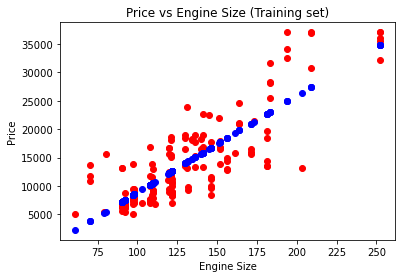

In [18]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], sr.predict(X_train[:, 10:11]), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

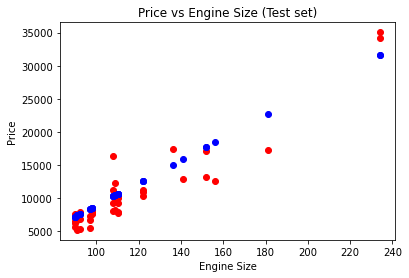

In [19]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], sr.predict(X_test[:, 10:11]), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [20]:
'''
   Оцінимо параметри багатофакторної лінійної регресії та виведемо значення цих оцінок та їхні p-значення, проведемо прогноз
за ними та перевіримо якість оцінки та прогнозу моделі.
'''

'\n   Оцінимо параметри багатофакторної лінійної регресії та виведемо значення цих оцінок та їхні p-значення, проведемо прогноз\nза ними та перевіримо якість оцінки та прогнозу моделі.\n'

In [21]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr=LinearRegression().fit(X_train, y_train)

In [22]:
# Getting parameters
mr.coef_, mr.intercept_

(array([[-9.16481940e+01, -5.29786974e+03,  2.48620947e+03,
          3.51040229e+02,  1.61014689e+04,  3.78404596e+01,
         -1.12170869e+02,  9.30339600e+02,  2.22765432e+02,
          8.11512445e+00,  7.77964277e+01,  1.38133865e+02,
         -4.57334366e+03, -7.78894560e+02, -2.35437626e+01,
          1.99329009e+00,  1.00184211e+01,  2.00801816e+02,
          1.96736425e+03, -1.22814657e+03, -1.66686862e+03,
         -1.33522378e+03,  2.46895756e+04,  3.70629085e+03,
         -2.98857632e+03, -2.24911178e+03, -4.20995626e+03,
         -1.63151813e+03, -1.50632637e+02, -2.26708765e+03,
          2.47530083e+03,  4.46897925e+03,  2.54825666e+04,
         -5.44772150e+03,  2.70004827e+04,  1.98077598e+04,
          2.02437890e+04, -3.49082425e+04, -3.42889693e+04,
         -2.47393736e+04, -3.04375078e+04, -1.15365073e+03,
          2.07994482e+03,  5.29786974e+03,  2.24958715e+03]]),
 array([-58356.79370017]))

In [23]:
# Predicting the Test set results
y_pred=mr.predict(X_test)

In [24]:
# Coefficient of determination R^2
training_score.append(mr.score(X_train, y_train))
test_score.append(mr.score(X_test, y_test))
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.9432010353696477, 0.8752466047580034)

In [25]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse.append(mean_squared_error(y_train, mr.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(3395102.768542555, 4967966.529026171)

In [26]:
# p-values
import statsmodels.api as sm
X_const=sm.add_constant(X_train)
mr1=sm.OLS(y_train, X_const).fit()
mr1.pvalues
#mr1.summary()

array([1.64369987e-03, 7.53953486e-01, 1.72763793e-05, 3.78460662e-02,
       6.11129033e-01, 4.42074270e-15, 7.38281729e-01, 3.46715264e-02,
       1.62156236e-03, 1.40141813e-01, 1.58335541e-04, 2.14412624e-02,
       9.36902057e-01, 2.26351444e-05, 1.04794969e-01, 3.53922465e-01,
       1.05445948e-02, 9.58685197e-01, 2.88912319e-01, 4.10725715e-01,
       1.97888032e-01, 7.47699968e-02, 1.23316417e-01, 1.11330948e-05,
       5.90570705e-02, 2.39696076e-05, 3.35652396e-02, 7.44421847e-04,
       7.85095411e-02, 8.87311877e-01, 7.34902097e-02, 1.09002759e-01,
       6.65233779e-03, 1.47310778e-09, 1.31606672e-01, 1.40660983e-10,
       1.80587773e-12, 2.94694385e-08, 9.10264480e-14, 6.99965460e-14,
       1.65844617e-08, 7.04769073e-12, 6.65619098e-01, 8.31630941e-02,
       8.21990759e-02, 5.98493946e-02])

In [27]:
'''
    Виведення p-значень оцінок параметрів моделі показало, що деякі ознаки не є значущими з рівнем значущості 0,05; тобто з
довірчою ймовірністю 95%. Таким чином їх можна усунути з моделі без значної втрати її високої якості, але спростивши її. Для
відбору значущих аргументів у подальшому буде використано метод оберненого виключення (Backward Elimination).
'''

'\n    Виведення p-значень оцінок параметрів моделі показало, що деякі ознаки не є значущими з рівнем значущості 0,05; тобто з\nдовірчою ймовірністю 95%. Таким чином їх можна усунути з моделі без значної втрати її високої якості, але спростивши її. Для\nвідбору значущих аргументів у подальшому буде використано метод оберненого виключення (Backward Elimination).\n'

In [28]:
'''
    Як і для однофакторної моделі, для багатофакторної також було графічно відображено залежність реальних і модельних даних
регресії від аргументу engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки
та прогнозу моделлю відповідно.
'''

'\n    Як і для однофакторної моделі, для багатофакторної також було графічно відображено залежність реальних і модельних даних\nрегресії від аргументу engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки\nта прогнозу моделлю відповідно.\n'

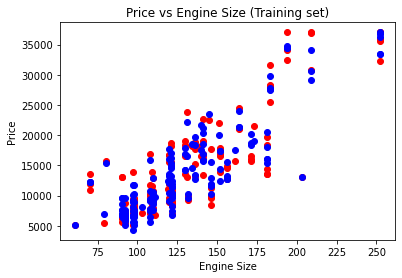

In [29]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], mr.predict(X_train), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

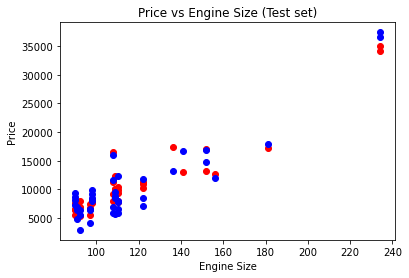

In [30]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], mr.predict(X_test), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [31]:
'''
    Також побудуємо полінімальну лінійну регресію другого ступеня, розглянувши окрім значень змінної engine-size, що найбільш
корелює з ціною автомобіля, також її квадрат. Для поліноміальної лінійної регресії буде оцінено її парамерти та виведено
значення цих оцінок, проведено прогноз за ними та перевірено якість оцінки та прогнозу моделі.
'''

'\n    Також побудуємо полінімальну лінійну регресію другого ступеня, розглянувши окрім значень змінної engine-size, що найбільш\nкорелює з ціною автомобіля, також її квадрат. Для поліноміальної лінійної регресії буде оцінено її парамерти та виведено\nзначення цих оцінок, проведено прогноз за ними та перевірено якість оцінки та прогнозу моделі.\n'

In [32]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p=PolynomialFeatures().fit_transform(X_train[:, 10:11])
X_test_p=PolynomialFeatures().fit_transform(X_test[:, 10:11])
pr=LinearRegression().fit(X_train_p[:, 1:], y_train)

In [33]:
# Getting parameters
pr.coef_, pr.intercept_

(array([[46.64010057,  0.40622499]]), array([444.94688909]))

In [34]:
# Predicting the Test set results
y_pred=pr.predict(X_test_p[:,1:])

In [35]:
# Coefficient of determination R^2
training_score.append(pr.score(X_train_p[:,1:], y_train))
test_score.append(pr.score(X_test_p[:, 1:], y_test))
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:, 1:], y_test)

(0.7246151784280663, 0.8709353953828536)

In [36]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse.append(mean_squared_error(y_train, pr.predict(X_train_p[:, 1:])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, pr.predict(X_train_p[:, 1:])), mean_squared_error(y_test, y_pred)

(16460859.387458714, 5139648.781311343)

In [37]:
'''
    Було графічно відображено залежність реальних і модельних даних поліноміальної регресії від аргументу engine-size для
навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу моделлю відповідно.
'''

'\n    Було графічно відображено залежність реальних і модельних даних поліноміальної регресії від аргументу engine-size для\nнавчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу моделлю відповідно.\n'

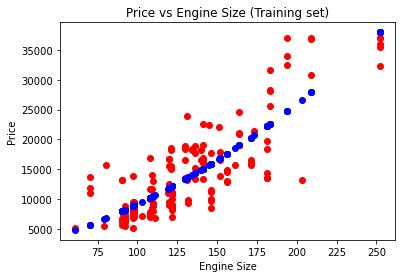

In [38]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

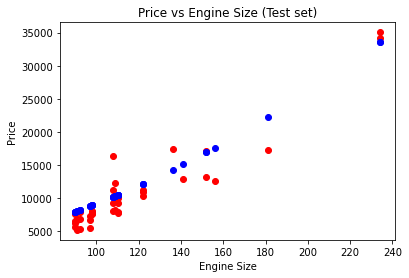

In [39]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], pr.predict(X_test_p[:, 1:]), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [40]:
'''
    Далі побудуємо багатофакторну лінійну модель зі значущими параметрами з рівнем значущості 0,05. Для цього використаємо
метод зворотного виключення (Backward Elimination).
'''

'\n    Далі побудуємо багатофакторну лінійну модель зі значущими параметрами з рівнем значущості 0,05. Для цього використаємо\nметод зворотного виключення (Backward Elimination).\n'

In [41]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars=len(x[0])
    for i in range(0, numVars):
        regressor_OLS=sm.OLS(y, x).fit()
        maxVar=max(regressor_OLS.pvalues).astype(float)
        if maxVar>sl:
            for j in range(0, numVars-i):
                if (regressor_OLS.pvalues[j].astype(float)==maxVar):
                    x=np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL=0.05
X_opt=X_train[:, :45]
y=y_train
X_Modeled=backwardElimination(X_opt, SL)
print(len(X_Modeled[0]))
print(X_Modeled)

27
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [42]:
'''
    Було відібрано 27 значущих змінних з усього 45 незалежних змінних при рівні значущості 0,05. Визначимо ж яким змінним
відповідають відібрані значення. Це робимо зокрема й для того, щоб можна було провести прогнозування ціни автомобіля на
основі даних тествої вибірки.
'''

'\n    Було відібрано 27 значущих змінних з усього 45 незалежних змінних при рівні значущості 0,05. Визначимо ж яким змінним\nвідповідають відібрані значення. Це робимо зокрема й для того, щоб можна було провести прогнозування ціни автомобіля на\nоснові даних тествої вибірки.\n'

In [43]:
# Comparing columns of X_train and X_Modeled
opt_columns=[]
for opt_column in range(len(X_Modeled[0])):
    for column in range(45):
        if np.array_equal(X_Modeled[:, opt_column], X_train[:, column]):
            opt_columns.append(column)
print(len(opt_columns))
print(opt_columns)
for column in df.iloc[:, opt_columns].columns:
    print(column)

27
[1, 2, 4, 6, 7, 8, 9, 10, 12, 15, 17, 22, 23, 24, 26, 27, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 43]
fuel-type
aspiration
engine-location
length
width
height
curb-weight
engine-size
stroke
peak-rpm
highway-mpg
make.peugot
make.subaru
make.toyota
make.volvo
body-style.hatchback
body-style.wagon
drive-wheels.rwd
engine-type.dohc
engine-type.ohc
engine-type.ohcf
engine-type.ohcv
num-of-cylinders.five
num-of-cylinders.four
num-of-cylinders.more than six
num-of-cylinders.six
fuel-system.idi


In [44]:
'''
   Оцінимо параметри оптимізованої багатофактроної лінійної регресії та виведемо значення цих оцінок, проведемо прогноз за
ними та перевіримо якість оцінки та прогнозу моделі.
'''

'\n   Оцінимо параметри оптимізованої багатофактроної лінійної регресії та виведемо значення цих оцінок, проведемо прогноз за\nними та перевіримо якість оцінки та прогнозу моделі.\n'

In [45]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr=LinearRegression().fit(X_train[:, opt_columns], y_train)

In [46]:
# Getting parameters
omr.coef_, omr.intercept_

(array([[-1.08535574e+14,  1.99023318e+03,  1.52786004e+04,
         -9.50001576e+01,  9.87496006e+02,  2.85603166e+02,
          6.21018982e+00,  8.07569482e+01, -4.56428542e+03,
          1.62020874e+00,  1.58735572e+02,  2.28361872e+04,
          5.26110624e+03, -2.49729066e+03, -3.54114000e+03,
         -1.50091263e+03, -1.98078328e+03,  2.54025348e+03,
          2.72648548e+04,  2.89000678e+04,  2.05456389e+04,
          2.12172153e+04, -3.29303713e+04, -3.30643298e+04,
         -2.33649830e+04, -2.93392963e+04, -1.08535574e+14]]),
 array([1.08535574e+14]))

In [47]:
# Predicting the Test set results
y_pred=omr.predict(X_test[:, opt_columns])

In [48]:
# Coefficient of determination R^2
training_score.append(omr.score(X_train[:, opt_columns], y_train))
test_score.append(omr.score(X_test[:, opt_columns], y_test))
omr.score(X_train[:, opt_columns], y_train), omr.score(X_test[:, opt_columns], y_test)

(0.9333510897467676, 0.9144832950269977)

In [49]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse.append(mean_squared_error(y_train, omr.predict(X_train[:, opt_columns])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, omr.predict(X_train[:, opt_columns])), mean_squared_error(y_test, y_pred)

(3983873.670826982, 3405471.4675650247)

In [50]:
'''
    Для оптимізованої багатофакторної лінійної моделі було графічно відображено залежність реальних і модельних даних
регресії від аргументу engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки
та прогнозу моделлю відповідно.
'''

'\n    Для оптимізованої багатофакторної лінійної моделі було графічно відображено залежність реальних і модельних даних\nрегресії від аргументу engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки\nта прогнозу моделлю відповідно.\n'

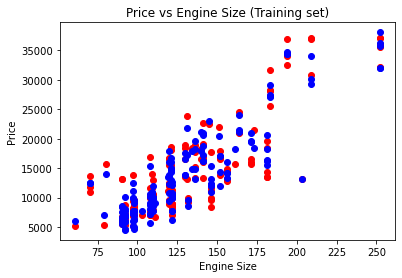

In [51]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], omr.predict(X_train[:, opt_columns]), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

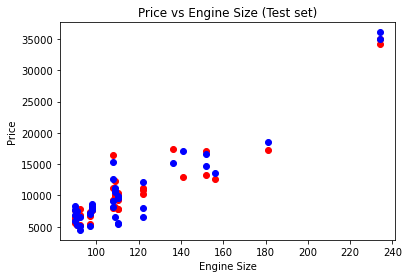

In [52]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], omr.predict(X_test[:, opt_columns]), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [53]:
'''
    Порівняємо моделі за такими метриками як коефіцієнт детермінації R^2 та середньоквадратична помилка MSE для навчальної та
тестової вибірки. Значення цих метрик розташовані за порядком розгляду відповідних моделей.
'''

'\n    Порівняємо моделі за такими метриками як коефіцієнт детермінації R^2 та середньоквадратична помилка MSE для навчальної та\nтестової вибірки. Значення цих метрик розташовані за порядком розгляду відповідних моделей.\n'

In [54]:
# Comparing models by metrics
print("Training R^2:")
print(training_score)
print("Test R^2:")
print(test_score)
print("Training MSE:")
print(training_mse)
print("Test MSE:")
print(test_mse)

Training R^2:
[0.712345293543277, 0.9432010353696477, 0.7246151784280663, 0.9333510897467676]
Test R^2:
[0.8598684966843289, 0.8752466047580034, 0.8709353953828536, 0.9144832950269977]
Training MSE:
[17194279.80124889, 3395102.768542555, 16460859.387458714, 3983873.670826982]
Test MSE:
[5580358.087921752, 4967966.529026171, 5139648.781311343, 3405471.4675650247]


In [55]:
'''
    З розглянутих даних можна побачити, що найкращий коефіцієнт детермінації для навчальної вибріки має багатофакторна
лінійна модель з усіма незалежними змінним, але оптимізована багатофакторна модель не дуже відстає від неї, хоча вона має
менше факторів, що зробило її простішою.
    З іншого боку, найкраще значення коефіцієнту детермінації для тестової вибірки має оптимізована багатофакторна модель.
Це показує те, що позбувшися деяких незначущих змінних, було покращено прогнозні якості моделі.
    Розглянувши значення коефіцієнтів детермінації для різних моделей, як найкращу можна вибрати оптимізовану багатофакторну
модель: вона незначно програє багатофакторній моделі з усіма незалежними ознаками в оцінці ціни автомобіля, але, будучи
простішою за неї, демонструє найкращі прогнозні якості з усіх розглянутих моделей.
    Результати по середньоквадратичній помилці MSE повторюють висновки по коефіцієнту детермінації. Таким чином, найкращою з
розглядуваних моделей для прогнозування ціни автомобіля є оптимізована багатофакторна лінійна регресія. Проте варто
розглянути моделі інших типів, окрім лінійної регресії, щодо їх придатності для оцінки та прогнозу ціни автомобіля. Для цього
експортуємо метрики якості лінійних моделей.
'''

'\n    З розглянутих даних можна побачити, що найкращий коефіцієнт детермінації для навчальної вибріки має багатофакторна\nлінійна модель з усіма незалежними змінним, але оптимізована багатофакторна модель не дуже відстає від неї, хоча вона має\nменше факторів, що зробило її простішою.\n    З іншого боку, найкраще значення коефіцієнту детермінації для тестової вибірки має оптимізована багатофакторна модель.\nЦе показує те, що позбувшися деяких незначущих змінних, було покращено прогнозні якості моделі.\n    Розглянувши значення коефіцієнтів детермінації для різних моделей, як найкращу можна вибрати оптимізовану багатофакторну\nмодель: вона незначно програє багатофакторній моделі з усіма незалежними ознаками в оцінці ціни автомобіля, але, будучи\nпростішою за неї, демонструє найкращі прогнозні якості з усіх розглянутих моделей.\n    Результати по середньоквадратичній помилці MSE повторюють висновки по коефіцієнту детермінації. Таким чином, найкращою з\nрозглядуваних моделей для прогнозу

In [56]:
# Creating dataset with metrics
model=['sr', 'mr', 'pr', 'omr']
metrics_df=pd.DataFrame()
metrics_df['model']=model
metrics_df['train_r2']=training_score
metrics_df['test_r2']=test_score
metrics_df['train_mse']=training_mse
metrics_df['test_mse']=test_mse
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.712345,0.859868,1.719428e+07,5.580358e+06
1,mr,0.943201,0.875247,3.395103e+06,4.967967e+06
2,pr,0.724615,0.870935,1.646086e+07,5.139649e+06
3,omr,0.933351,0.914483,3.983874e+06,3.405471e+06


In [57]:
# Exporting the dataset
metrics_df.to_csv('Metrics (Tomilovych, EC-61).csv', sep=';', index=False)